# Facial Keypoints + Bounding Box

In this notebook we will learn to extract and visualize our facial landmarks (aka keypoints) modality, as well as the face bounding box Datagen prodives as part of our pixel-perfect annotations. We offer both [standard keypoints (iBUG format)](https://docs.datagen.tech/en/latest/Modalities/iBUG_face.html) and [dense keypoints (MediaPipe format)](https://docs.datagen.tech/en/latest/Modalities/MediaPipe_face.html).  

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch, Rectangle
from copy import copy

import datagen
from lib.dghelpers import imshow, world_to_img, show_keypoints

## Creation of a Dataset container

In [2]:
DATASET_PATH= '../resources/faces_1'
dp = datagen.load(DATASET_PATH)[2]

## Face keypoints and bounding box

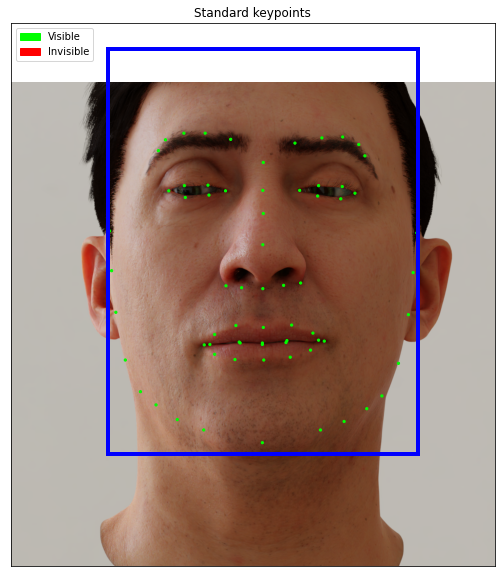

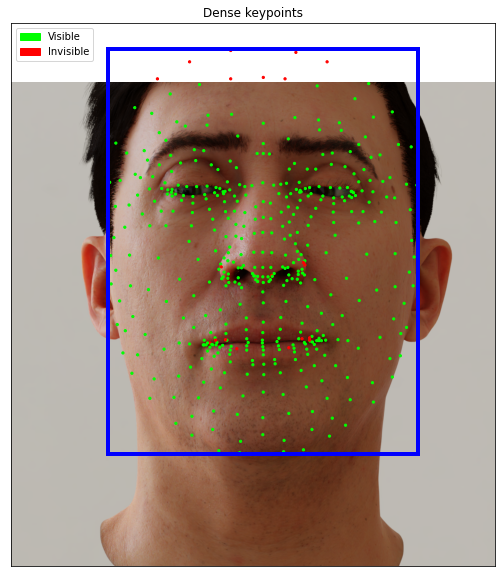

In [3]:
rect1 = Rectangle((dp.face_bounding_box.min_y, dp.face_bounding_box.min_x), 
                  dp.face_bounding_box.max_y - dp.face_bounding_box.min_y, 
                  dp.face_bounding_box.max_x - dp.face_bounding_box.min_x, 
                  linewidth=4, edgecolor='b', facecolor='none')
rect2 = copy(rect1)
show_keypoints(img=dp.visible_spectrum, keypoints=dp.keypoints.face.standard.coords_2d, visible=dp.keypoints.face.standard.is_visible, title='Standard keypoints')
plt.gca().add_patch(rect1)
show_keypoints(img=dp.visible_spectrum, keypoints=dp.keypoints.face.dense.coords_2d, visible=dp.keypoints.face.dense.is_visible, title='Dense keypoints')
plt.gca().add_patch(rect2)

## Eye keypoints

Text(0.5, 1.0, 'Pupil and iris keypoints')

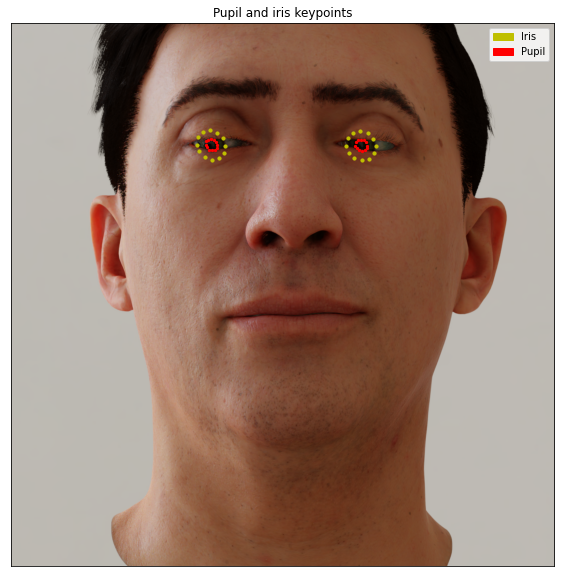

In [4]:
iris_keypoints = np.vstack([dp.actor_metadata.iris_circle.coords_2d[0].right_eye, dp.actor_metadata.iris_circle.coords_2d[0].left_eye])
pupil_keypoints = np.vstack([dp.actor_metadata.pupil_circle.coords_2d[0].right_eye, dp.actor_metadata.pupil_circle.coords_2d[0].left_eye])
eye_keypoints = np.vstack([iris_keypoints, pupil_keypoints])

imshow(dp.visible_spectrum)
plt.scatter(iris_keypoints[:, 1], iris_keypoints[:, 0], s=10, c='y')
plt.scatter(pupil_keypoints[:, 1], pupil_keypoints[:, 0], s=5, c='r')

plt.legend(handles=[Patch(color='y', label='Iris'), Patch(color='r', label='Pupil')])
plt.title('Pupil and iris keypoints')

## Eyelids dense keypoints
Let's plot the dense keypoints for the eyelids

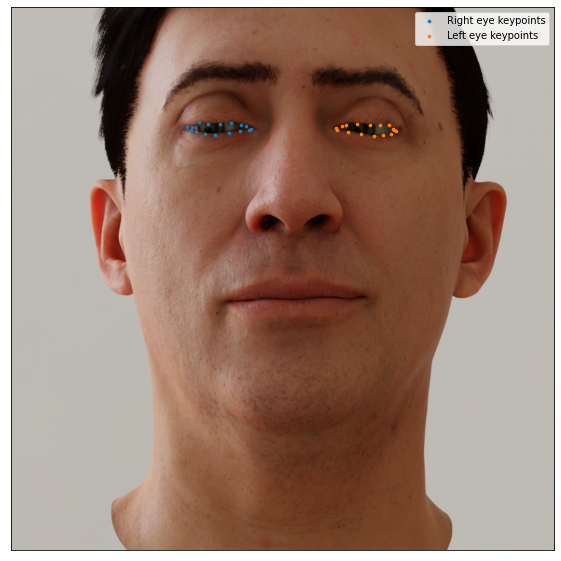

In [5]:
right_eye_kpts = [33, 246, 161, 160, 159, 158, 157, 173, 133, 155, 154, 153, 145, 144, 163, 7]
left_eye_kpts = [362, 398, 384, 385, 386, 387, 388, 466, 263, 249, 390, 373, 374, 380, 381, 382]

imshow(dp.visible_spectrum)

plt.scatter(*np.flip(dp.keypoints.face.dense.coords_2d[right_eye_kpts]).T, s=7, label='Right eye keypoints')
plt.scatter(*np.flip(dp.keypoints.face.dense.coords_2d[left_eye_kpts]).T, s=7, label='Left eye keypoints')
plt.legend()

## Visualization of important points

2D points have to be flipped before plotting since they are given in pixel coordinates

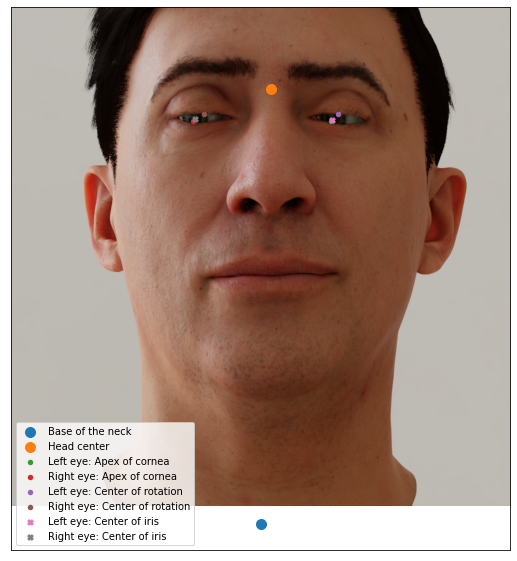

In [6]:
head_root = world_to_img(dp.actor_metadata.head_metadata.head_root_location, dp.camera_metadata.intrinsic_matrix, dp.camera_metadata.extrinsic_matrix)
head_center = world_to_img(dp.actor_metadata.head_metadata.head_six_dof.location, dp.camera_metadata.intrinsic_matrix, dp.camera_metadata.extrinsic_matrix)

imshow(dp.visible_spectrum)
plt.scatter(*head_root, s=100, label='Base of the neck')
plt.scatter(*head_center, s=100, label='Head center')
plt.scatter(*np.flip(dp.actor_metadata.apex_of_cornea_point.coords_2d[0].left_eye), s=20, label='Left eye: Apex of cornea')
plt.scatter(*np.flip(dp.actor_metadata.apex_of_cornea_point.coords_2d[0].right_eye), s=20, label='Right eye: Apex of cornea')
plt.scatter(*np.flip(dp.actor_metadata.center_of_rotation_point.coords_2d[0].left_eye), s=20, label='Left eye: Center of rotation')
plt.scatter(*np.flip(dp.actor_metadata.center_of_rotation_point.coords_2d[0].right_eye), s=20, label='Right eye: Center of rotation')
plt.scatter(*np.flip(dp.actor_metadata.center_of_iris_point.coords_2d[0].left_eye), s=30, marker='X', label='Left eye: Center of iris')
plt.scatter(*np.flip(dp.actor_metadata.center_of_iris_point.coords_2d[0].right_eye), s=30, marker='X', label='Right eye: Center of iris')


plt.legend()